In [234]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# NYTimes Bestselling List
### Available data: Title, Author, Publisher, Description, Weeks on Best Selling list

In [235]:
urls = {
    'combined print and ebook fiction':'https://www.nytimes.com/books/best-sellers/combined-print-and-e-book-fiction/',
    'combined print and ebook non-fiction':'https://www.nytimes.com/books/best-sellers/combined-print-and-e-book-nonfiction/',
    'hardcover fiction':'https://www.nytimes.com/books/best-sellers/hardcover-fiction/',
    'hardcover non-fiction':'https://www.nytimes.com/books/best-sellers/hardcover-nonfiction/',
    'paperback fiction':'https://www.nytimes.com/books/best-sellers/trade-fiction-paperback/',
    'paperback non-fiction':'https://www.nytimes.com/books/best-sellers/paperback-nonfiction/',
    'advice':'https://www.nytimes.com/books/best-sellers/advice-how-to-and-miscellaneous/',
    'childrens hardcover':'https://www.nytimes.com/books/best-sellers/childrens-middle-grade-hardcover/',
    'childrens picture':'https://www.nytimes.com/books/best-sellers/picture-books/',
    'childrens series':'https://www.nytimes.com/books/best-sellers/series-books/', 
    'young adult hardcover':'https://www.nytimes.com/books/best-sellers/young-adult-hardcover/'
}

Lists = ['combined print and ebook fiction', 'combined print and ebook non-fiction', 'hardcover fiction', 'hardcover non-fiction', 
        'paperback fiction', 'paperback non-fiction', 'advice', 'childrens hardcover', 'childrens picture', 'childrens series', 'young adult hardcover']
sites = [requests.get(url) for url in urls.values()]

titles=[]
descriptions=[]

list(sites[0])[0]
all_ny_df = pd.DataFrame(columns =['List', 'Title', 'Author', 'Publisher', 'Weeks_on_list', 'Description'])

count = 0
for html in sites:
    List = Lists[count]
    list_data = []
    rank = []
    count+=1
    
    
    
    soup = BeautifulSoup(html.text, 'html5lib')
    titles = [title.text for title in soup.findAll('h3')]

    publishers = soup('p', attrs={'class':'css-heg334'})
    publishers = [publisher.text for publisher in publishers]

    authors = soup('p', attrs={'class':'css-hjukut'})
    authors = [author.text for author in authors]
    authors = [author.replace("by ", "") for author in authors]

    weeks_on_list = soup('p', attrs={'class':'css-1o26r9v'})
    weeks_on_list = [week.text for week in weeks_on_list]
    wol = []
    for week in weeks_on_list:
        if week == 'New this week':
            wol.append(0)
        else: 
            wol.append(int(re.findall('[0-9]+', week)[0]))

    descriptions = soup('p', attrs={'class':'css-14lubdp'})
    descriptions = [description.text for description in descriptions]
    
    for i in range(len(authors)):
        list_data.append(List)
    for i in range(len(authors)):
        rank.append(i+1)
    
    list_df = pd.DataFrame(list(zip(list_data, rank, titles, authors, publishers, wol, descriptions)),
                   columns =['List', 'Rank', 'Title', 'Author', 'Publisher', 'Weeks_on_list', 'Description'])
    
    
    all_ny_df = pd.concat([all_ny_df, list_df])

by_type = all_ny_df[['List', 'Title', 'Author', 'Weeks_on_list']]
all_ny_df

,List,Title,Author,Publisher,Weeks_on_list,Description,Rank
0,combined print and ebook fiction,Books|Best Sellers,Colleen Hoover,Atria,86,A battered wife raised in a violent home attem...,1.0
1,combined print and ebook fiction,IT ENDS WITH US,Colleen Hoover,Atria,16,"In the sequel to “It Ends With Us,” Lily deals...",2.0
2,combined print and ebook fiction,IT STARTS WITH US,Bonnie Garmus,Doubleday,13,A scientist and single mother living in Califo...,3.0
3,combined print and ebook fiction,LESSONS IN CHEMISTRY,Colleen Hoover,Grand Central,61,Lowen Ashleigh is hired by the husband of an i...,4.0
4,combined print and ebook fiction,VERITY,Colleen Hoover,Atria,0,After an unexpected death prevents her from go...,5.0
...,...,...,...,...,...,...,...
5,young adult hardcover,FIVE SURVIVE,Adam Silvera,Quill Tree,18,"In this prequel to ""They Both Die at the End,""...",6.0
6,young adult hardcover,THE FIRST TO DIE AT THE END,Karen M. McManus,Delacorte,262,"For five students, a detour into detention end...",7.0
7,young adult hardcover,ONE OF US IS LYING,Alex Aster,Amulet,24,Every 100 years the island of Lightlark appear...,8.0
8,young adult hardcover,LIGHTLARK,Kiera Cass,HarperTeen,8,Annika and Lennox are lovers on opposing sides...,9.0


In [236]:
all_ny_df = all_ny_df[all_ny_df.Weeks_on_list <400]
# all_ny_df['Weeks_on_list'] = [all_ny_df.Weeks_on_list for week in Weeks_on_list if all_ny_df.Weeks_on_list < 400]
all_ny_df

,List,Title,Author,Publisher,Weeks_on_list,Description,Rank
0,combined print and ebook fiction,Books|Best Sellers,Colleen Hoover,Atria,86,A battered wife raised in a violent home attem...,1.0
1,combined print and ebook fiction,IT ENDS WITH US,Colleen Hoover,Atria,16,"In the sequel to “It Ends With Us,” Lily deals...",2.0
2,combined print and ebook fiction,IT STARTS WITH US,Bonnie Garmus,Doubleday,13,A scientist and single mother living in Califo...,3.0
3,combined print and ebook fiction,LESSONS IN CHEMISTRY,Colleen Hoover,Grand Central,61,Lowen Ashleigh is hired by the husband of an i...,4.0
4,combined print and ebook fiction,VERITY,Colleen Hoover,Atria,0,After an unexpected death prevents her from go...,5.0
...,...,...,...,...,...,...,...
5,young adult hardcover,FIVE SURVIVE,Adam Silvera,Quill Tree,18,"In this prequel to ""They Both Die at the End,""...",6.0
6,young adult hardcover,THE FIRST TO DIE AT THE END,Karen M. McManus,Delacorte,262,"For five students, a detour into detention end...",7.0
7,young adult hardcover,ONE OF US IS LYING,Alex Aster,Amulet,24,Every 100 years the island of Lightlark appear...,8.0
8,young adult hardcover,LIGHTLARK,Kiera Cass,HarperTeen,8,Annika and Lennox are lovers on opposing sides...,9.0


In [237]:
all_ny_df['Weeks_on_list'] = all_ny_df['Weeks_on_list'].astype(int)

/tmp/ipykernel_1698/2345474405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_ny_df['Weeks_on_list'] = all_ny_df['Weeks_on_list'].astype(int)


# Does Rank Correlate with Time on Bestselling List

In [238]:
print("mean: " + f"{all_ny_df['Weeks_on_list'].mean()}")
print("std: " + f"{all_ny_df['Weeks_on_list'].std()}")

mean: 47.56204379562044
std: 73.35177744687388


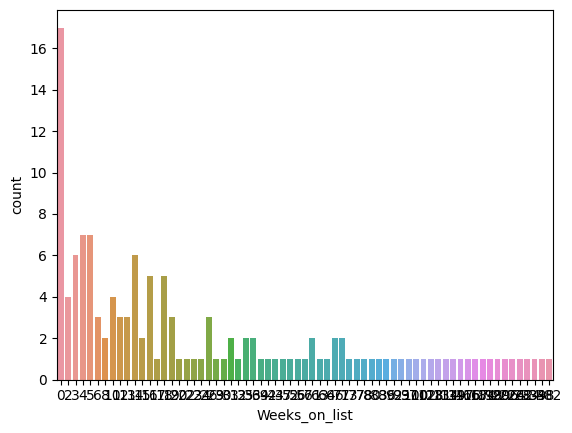

In [239]:
g3 = sns.countplot(data=all_ny_df, x='Weeks_on_list')

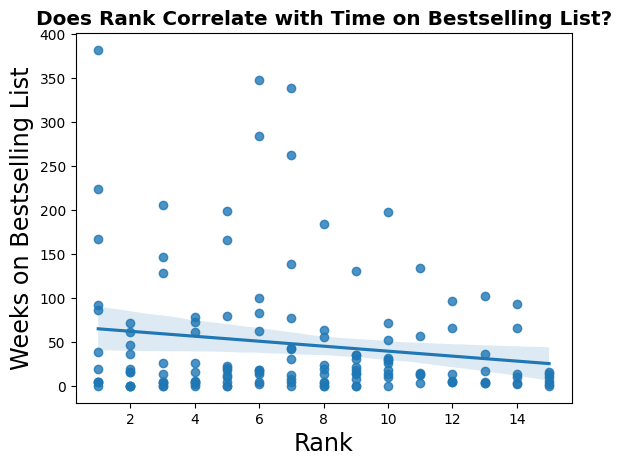

In [240]:
g = sns.regplot(data=all_ny_df, x='Rank', y='Weeks_on_list')
# g.set(ylabel = 'Weeks on Bestselling List', fontsize=15)
# plt.ylabel('Weeks on Bestselling List')
plt.title ('Does Rank Correlate with Time on Bestselling List?', size='x-large', fontweight='bold')
plt.xlabel('Rank', size='xx-large')
plt.ylabel('Weeks on Bestselling List', size='xx-large')
plt.savefig('Weeks_Rank.png')
plt.show()
plt.close()

In [241]:
display(stats.pearsonr(all_ny_df['Rank'], all_ny_df['Weeks_on_list']))

PearsonRResult(statistic=-0.15722197102826466, pvalue=0.06653489390984983)

# Boxplots on weeks on list grouped by author and publisher

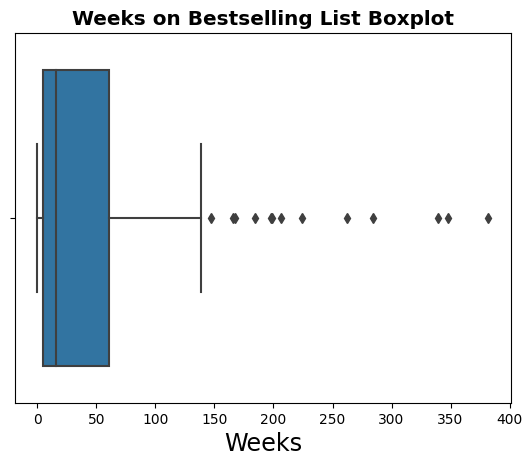

In [242]:
g2 = sns.boxplot(data=all_ny_df, x='Weeks_on_list')
plt.title ('Weeks on Bestselling List Boxplot', size='x-large', fontweight='bold')
plt.xlabel('Weeks', size='xx-large')
plt.savefig('Weeks_Box.png')
plt.show()
plt.close()

In [243]:
all_ny_df['Weeks_on_list'] = all_ny_df['Weeks_on_list'].astype(int)

/tmp/ipykernel_1698/2345474405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_ny_df['Weeks_on_list'] = all_ny_df['Weeks_on_list'].astype(int)


/tmp/ipykernel_1698/2350128998.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  publishers = all_ny_df.groupby(['Publisher']).agg('sum').reset_index()


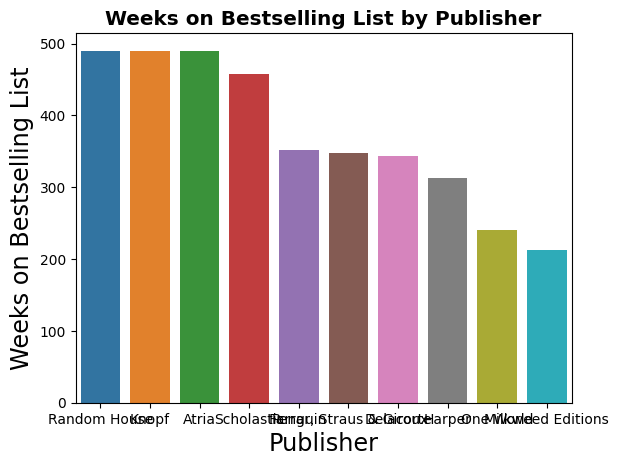

In [244]:
# temp = df1.groupby(['Zip_Code_Crime', 'Populationbelowpovertylevel','Percentageofhomeswithin1/4-mioftransitstop' ,'Averagemonthlytransportationcost' ])['Highest_NIBRS_UCR_Offense_Description'].count().reset_index()

# publishers = all_ny_df.groupby(['Publisher'])['Weeks_on_list'].agg('sum').reset_index()
publishers = all_ny_df.groupby(['Publisher']).agg('sum').reset_index()
publishers

sort_pub = publishers.sort_values(['Weeks_on_list'], ascending=False)
sort_pub
sort_pub = sort_pub.head(10)
sort_pub



g4 = sns.barplot(data=sort_pub, x='Publisher', y='Weeks_on_list')
plt.title ('Weeks on Bestselling List by Publisher', size='x-large', fontweight='bold')
plt.xlabel('Publisher', size='xx-large')
plt.ylabel('Weeks on Bestselling List', size='xx-large')
plt.savefig('Weeks_Publisher.png')
plt.show()
plt.close()

/tmp/ipykernel_1698/446135230.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  authors = all_ny_df.groupby(['Author']).agg('sum').reset_index()


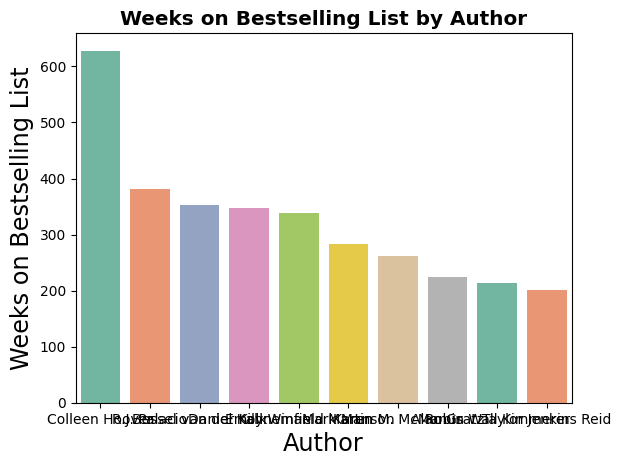

In [245]:
authors = all_ny_df.groupby(['Author']).agg('sum').reset_index()
authors

sort_auth = authors.sort_values(['Weeks_on_list'], ascending=False)
sort_auth
sort_auth = sort_auth.head(10)
sort_auth



# sns.barplot(data=sort_pub, x='Publisher', y='Weeks_on_list')

g2 = sns.barplot(data=sort_auth, y='Weeks_on_list', x="Author", palette='Set2')
plt.title ('Weeks on Bestselling List by Author', size='x-large', fontweight='bold')
plt.xlabel('Author', size='xx-large')
plt.ylabel('Weeks on Bestselling List', size='xx-large')
plt.savefig('Weeks_Author.png')
plt.show()
plt.close()

In [246]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
# Import stopwords with scikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS


# all_ny_df['tokenized_desc'] = df['Description'].apply(lambda x: (x.lower()).split())

all_ny_df['desc_without_stop'] = all_ny_df['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
all_ny_df

common_words = Counter(" ".join(all_ny_df["desc_without_stop"].str.lower()).split()).most_common(25)



LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/carson2stoker/nltk_data'
    - '/home/carson2stoker/anaconda3/nltk_data'
    - '/home/carson2stoker/anaconda3/share/nltk_data'
    - '/home/carson2stoker/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
common_df = pd.DataFrame(common_words, columns =['Most Common Words', 'Count'])
print(common_df)
import dataframe_image as dfi


In [ ]:

word = []
count = []
for key, value in common_words:
    word.append(key)
    count.append(value)
    
# plt.bar(word, count, width=1.0)
sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x= word, y=count)
plt.title('Most Common Words in Bestselling Book Descriptions', size='x-large', fontweight='bold')
plt.savefig('common_words.png')
plt.close()

In [247]:
by_type['Weeks_on_list'] = by_type['Weeks_on_list'].astype(int)
by_type_mean = by_type.groupby(by_type.List).agg({'Weeks_on_list':'mean'}).reset_index()
by_type_std = by_type.groupby(by_type.List).agg({'Weeks_on_list':'std'}).reset_index()
by_type_mean.rename(columns={'List': 'Type','Weeks_on_list':'Mean'}, inplace=True)
by_type_std.rename(columns={'List': 'Type','Weeks_on_list':'Std'}, inplace=True)
by_type_stats = pd.merge(by_type_mean, by_type_std, on='Type')
by_type_stats['Type'][4] = 'print/ebook fiction'
by_type_stats['Type'][5] = 'print/ebook non-fiction'

for i in range(len(by_type)):
    type = by_type.iloc[i]['List']
    if  (type == 'combined print and ebook fiction') | (type == 'hardcover fiction') | (type == 'paperback fiction'):
        by_type.iloc[[i],[0]] = 'fiction'
    elif  type == 'combined print and ebook non-fiction' or type == 'hardcover non-fiction' or type == 'paperback non-fiction' or type == 'advice':
        by_type.iloc[[i],[0]] = 'non-fiction'
    else: 
        by_type.iloc[[i],[0]] = 'childrens'

/tmp/ipykernel_1698/2481357319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_type['Weeks_on_list'] = by_type['Weeks_on_list'].astype(int)
/tmp/ipykernel_1698/2481357319.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_type_stats['Type'][4] = 'print/ebook fiction'
/tmp/ipykernel_1698/2481357319.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_type_stats['Type'

In [248]:
        
by_type_mean = by_type.groupby(by_type.List).agg({'Weeks_on_list':'mean'}).reset_index()
by_type_std = by_type.groupby(by_type.List).agg({'Weeks_on_list':'std'}).reset_index()
by_type_mean.rename(columns={'List': 'Type','Weeks_on_list':'Mean'}, inplace=True)
by_type_std.rename(columns={'List': 'Type','Weeks_on_list':'Std'}, inplace=True)
condensed_stats = pd.merge(by_type_mean, by_type_std, on='Type')       
by_type

,List,Title,Author,Weeks_on_list
0,fiction,Books|Best Sellers,Colleen Hoover,86
1,fiction,IT ENDS WITH US,Colleen Hoover,16
2,fiction,IT STARTS WITH US,Bonnie Garmus,13
3,fiction,LESSONS IN CHEMISTRY,Colleen Hoover,61
4,fiction,VERITY,Colleen Hoover,0
...,...,...,...,...
5,childrens,FIVE SURVIVE,Adam Silvera,18
6,childrens,THE FIRST TO DIE AT THE END,Karen M. McManus,262
7,childrens,ONE OF US IS LYING,Alex Aster,24
8,childrens,LIGHTLARK,Kiera Cass,8


,Type,Mean,Std
0,childrens,110.700000,194.026062
1,fiction,32.777778,34.592359
2,non-fiction,49.472727,78.380566


Text(0.5, 1.0, 'Average Number of Weeks on the Bestseller List by Type of Book')

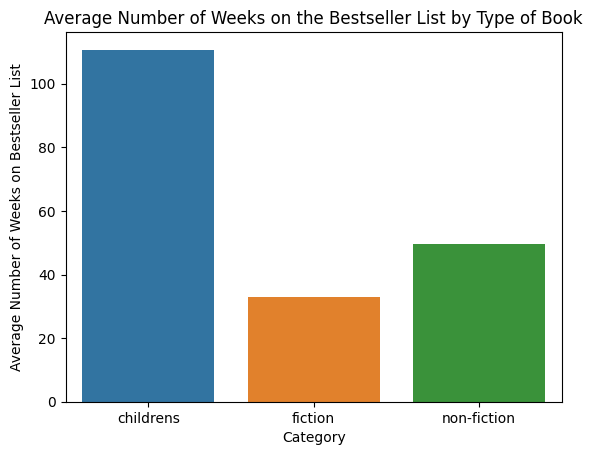

In [249]:
display(condensed_stats)
plt.figure()
ax = sns.barplot(data=condensed_stats, x='Type', y='Mean')
ax.set_ylabel("Average Number of Weeks on Bestseller List")
ax.set_xlabel("Category")
ax.set_title("Average Number of Weeks on the Bestseller List by Type of Book")

In [250]:
display(stats.ttest_ind(by_type[by_type.List == 'fiction'].Weeks_on_list, by_type[by_type.List == 'non-fiction'].Weeks_on_list))
display(stats.ttest_ind(by_type[by_type.List == 'childrens'].Weeks_on_list, by_type[by_type.List == 'fiction'].Weeks_on_list))
display(stats.ttest_ind(by_type[by_type.List == 'childrens'].Weeks_on_list, by_type[by_type.List == 'non-fiction'].Weeks_on_list))

Ttest_indResult(statistic=-1.3261517405569672, pvalue=0.18787196119607197)

Ttest_indResult(statistic=2.6490121418271912, pvalue=0.009662023808635463)

Ttest_indResult(statistic=2.117902360837534, pvalue=0.03685065880296003)

,Type,Mean,Std
0,advice,72.200000,98.819476
1,childrens hardcover,95.500000,118.449474
2,childrens picture,47.500000,103.243240
3,childrens series,263.600000,308.563050
4,print/ebook fiction,29.466667,30.921252
5,print/ebook non-fiction,22.466667,34.184095
6,hardcover fiction,17.200000,25.821364
7,hardcover non-fiction,13.933333,17.160864
8,paperback fiction,51.666667,38.522102
9,paperback non-fiction,96.866667,105.097143


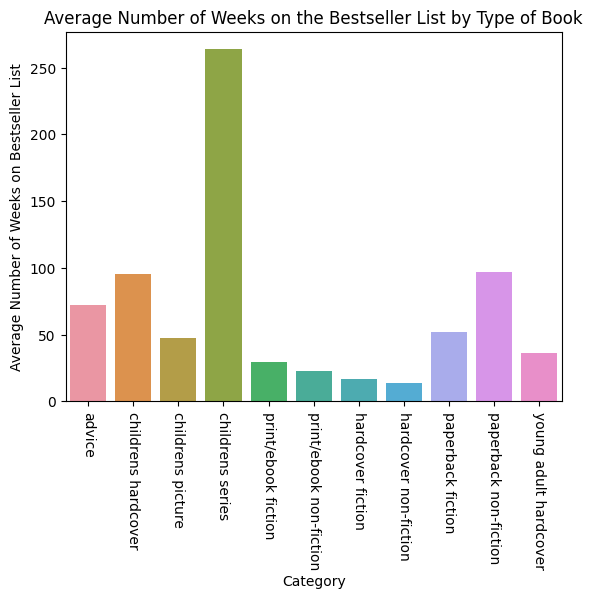

In [251]:
plt.figure()
ax = sns.barplot(data=by_type_stats, x='Type', y='Mean')
ax.tick_params(axis='x', rotation=-90, labelsize=10)
ax.set_ylabel("Average Number of Weeks on Bestseller List")
ax.set_xlabel("Category")
ax.set_title("Average Number of Weeks on the Bestseller List by Type of Book")
display(by_type_stats)

In [ ]:

# html = requests.get('https://www.nytimes.com/books/best-sellers/combined-print-and-e-book-fiction/', timeout=(5, 30))
# soup = BeautifulSoup(html.text, 'html5lib')

In [ ]:
# titles=[]
# descriptions=[]
# for title in soup.findAll('h3'):
#     titles.append(title)

In [ ]:
# titles = [title.text for title in titles]
# titles

In [ ]:
# publishers = soup('p', attrs={'class':'css-heg334'})
# publishers = [publisher.text for publisher in publishers]
# publishers

In [ ]:
# authors = soup('p', attrs={'class':'css-hjukut'})
# authors = [author.text for author in authors]
# authors = [author.replace("by ", "") for author in authors]
# authors 

In [ ]:
# weeks_on_list = soup('p', attrs={'class':'css-1o26r9v'})
# weeks_on_list = [week.text for week in weeks_on_list]
# wol = []
# for week in weeks_on_list:
#     if week == 'New this week':
#         wol.append(0)
#     else: 
#         wol.append(int(re.findall('[0-9]+', week)[0]))
        
# print(wol)

In [ ]:
# descriptions = soup('p', attrs={'class':'css-14lubdp'})
# descriptions = [description.text for description in descriptions]
# descriptions

In [ ]:
# ny_df = pd.DataFrame(list(zip(titles, authors, publishers, wol, descriptions)),
#                columns =['Title', 'Author', 'Publisher', 'Weeks_on_list', 'Description'])

# ny_df

# Wikipedia Best Selling all time
### Data Available: Title, Author, Language, Date, Copies sold, Genre

In [252]:
html = requests.get('https://en.wikipedia.org/wiki/List_of_best-selling_books', timeout=(5, 30))
soup = BeautifulSoup(html.text, 'html5lib')

In [253]:
for titles in soup.find_all('a', href=True):
    titles.get_attribute_list('title')

In [254]:
titles = set()
authors = set()
genres = set()
trash = set()
languages = []
dates = []
sales = []
genres = []
info = []
counter = 0
for items in soup.find_all('table'):
    counter+=1
    for books in items.find_all('tr'):
        for columns in books.find_all('td'):

            info.append(columns.text)
    if counter == 3:
        break

In [255]:
titles = info[0::6]
titles = [title.rstrip() for title in titles]


authors = info[1::6]
authors = [author.rstrip() for author in authors]


languages = info[2::6]
languages = [language.rstrip() for language in languages]


dates = info[3::6]
dates = [int(re.findall('[0-9]+', date)[0]) for date in dates]

copies_sold = info[4::6]
copies_sold = [int(re.findall('[0-9]+', copies)[0]) for copies in copies_sold]

genres =info[5::6]
genres = [genre.lower().rstrip() for genre in genres]


In [267]:


df = pd.DataFrame(list(zip(titles, authors, languages, dates, copies_sold, genres)),
               columns =['Title', 'Author', 'Language', 'Publication Date', 'Copies Sold (millions)', 'Genre'])

df

,Title,Author,Language,Publication Date,Copies Sold (millions),Genre
0,Don Quixote,Miguel de Cervantes,Spanish,1605,500,10
1,A Tale of Two Cities,Charles Dickens,English,1859,200,8
2,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200,7
3,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120,3
4,And Then There Were None,Agatha Christie,English,1939,100,3
...,...,...,...,...,...,...
68,Lust for Life,Irving Stone,English,1934,25,1
69,The Wind in the Willows,Kenneth Grahame,English,1908,25,1
70,The 7 Habits of Highly Effective People,Stephen R. Covey,English,1989,25,1
71,Virgin Soil Upturned (Поднятая целина),Mikhail Sholokhov,Russian,1935,24,1


r = 0.6116083147000184 p = 9.029187429519936e-09


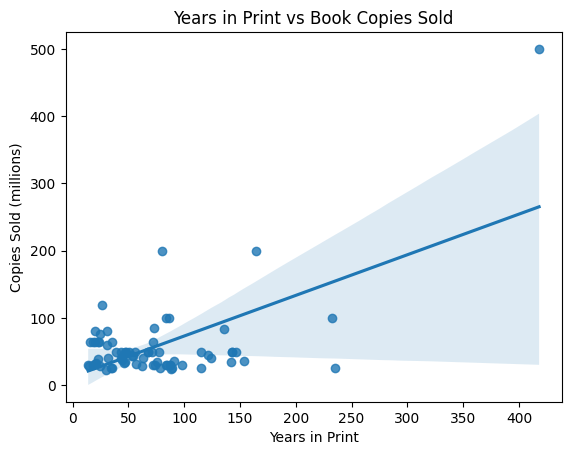

In [278]:
# time in print vs approximate sales
df['Years in Print'] = 2023 - df['Publication Date']
df
ax = sns.regplot(data=df, x='Years in Print', y='Copies Sold (millions)').set(title='Years in Print vs Book Copies Sold')
(r,p) = stats.pearsonr(df['Years in Print'], df['Copies Sold (millions)'])
print('r =', r, 'p =', p)


r = 0.1462664272549143 p = 0.2201999451408536


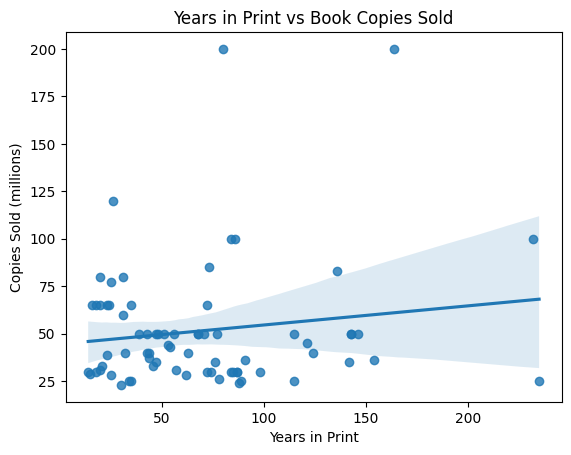

In [279]:
# taking out don quixote
no_don = df[df['Years in Print'] < 300]
ax = sns.regplot(data=no_don, x='Years in Print', y='Copies Sold (millions)').set(title='Years in Print vs Book Copies Sold')
(r,p) = stats.pearsonr(no_don['Years in Print'], no_don['Copies Sold (millions)'])
print('r =', r, 'p =', p)

In [268]:
#sns.scatterplot(data=df,x='Publication Date', y='Copies Sold (millions)')

In [269]:
df2 = df.drop(axis=0,index=0)

In [270]:
#sns.scatterplot(data=df2,x='Publication Date', y='Copies Sold (millions)')

In [271]:
#sns.histplot(data=df, x='Copies Sold (millions)')

In [272]:
#df['Language'].value_counts()

In [273]:
# genres = df['Genre'].value_counts()
# popular_genres = genres[0:10]
# popular_genres

In [274]:
# genre_df = popular_genres.groupby('Genre')
# genre_df

In [275]:
#sns.histplot(data=df, x='Publication Date')

In [276]:
#sns.barplot(data=df, x='Genre', y='Copies Sold (millions)')

In [277]:
# soup.find_all('table') atts= {'class' : 'wikitable sortable jquery-tablesorter'}